In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_theme(style='white')

In [2]:
# load data

df = pd.read_csv("../data/elb_request_count_8c0756.csv")
df.head()

,timestamp,value
0,2014-04-10 00:04:00,94.0
1,2014-04-10 00:09:00,56.0
2,2014-04-10 00:14:00,187.0
3,2014-04-10 00:19:00,95.0
4,2014-04-10 00:24:00,51.0


In [3]:
df.dtypes

timestamp     object
value        float64
dtype: object

In [4]:
# conver timestamp to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dtypes

timestamp    datetime64[ns]
value               float64
dtype: object

In [5]:
df.describe()

,timestamp,value
count,4032,4032.000000
mean,2014-04-17 00:24:57.142857216,61.837054
min,2014-04-10 00:04:00,1.000000
25%,2014-04-13 12:12:45,15.000000
50%,2014-04-17 00:26:30,48.000000
75%,2014-04-20 12:40:15,89.000000
max,2014-04-24 00:39:00,656.000000
std,NaN,56.664703


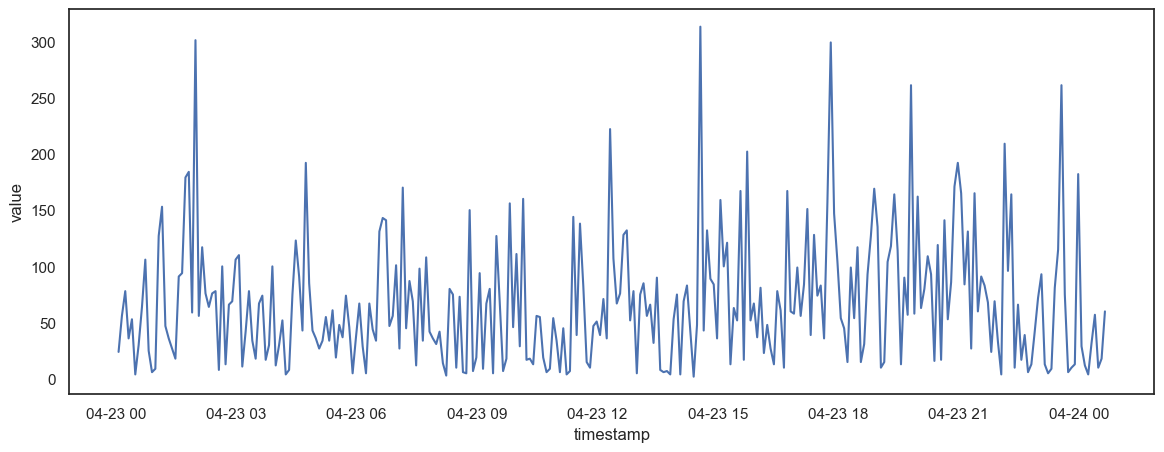

In [6]:
# plot the parrt of data frame
plt.figure(figsize=(14,5))
# _ = sb.lineplot(data=df,x='timestamp',y='value')
_ = sb.lineplot(data=df[df['timestamp'] >= '2014-04-23'],x='timestamp',y='value')

In [7]:
# create a timeseris 
window_size = 5
for i in range(window_size):
    df['prev_' + str(i+1)] = df['value'].shift(i+1)
    # delete a row  with epmety data
df = df.dropna()
df

,timestamp,value,prev_1,prev_2,prev_3,prev_4,prev_5
5,2014-04-10 00:29:00,10.0,51.0,95.0,187.0,56.0,94.0
6,2014-04-10 00:34:00,49.0,10.0,51.0,95.0,187.0,56.0
7,2014-04-10 00:39:00,79.0,49.0,10.0,51.0,95.0,187.0
8,2014-04-10 00:44:00,24.0,79.0,49.0,10.0,51.0,95.0
9,2014-04-10 00:49:00,73.0,24.0,79.0,49.0,10.0,51.0
...,...,...,...,...,...,...,...
4027,2014-04-24 00:19:00,32.0,4.0,12.0,29.0,182.0,13.0
4028,2014-04-24 00:24:00,57.0,32.0,4.0,12.0,29.0,182.0
4029,2014-04-24 00:29:00,10.0,57.0,32.0,4.0,12.0,29.0
4030,2014-04-24 00:34:00,18.0,10.0,57.0,32.0,4.0,12.0


In [8]:
# convert data to numpy array
X = df[['value'] + ['prev_'+ str(i+1) for i in range(window_size)]].values

In [9]:
X

array([[ 10.,  51.,  95., 187.,  56.,  94.],
       [ 49.,  10.,  51.,  95., 187.,  56.],
       [ 79.,  49.,  10.,  51.,  95., 187.],
       ...,
       [ 10.,  57.,  32.,   4.,  12.,  29.],
       [ 18.,  10.,  57.,  32.,   4.,  12.],
       [ 60.,  18.,  10.,  57.,  32.,   4.]])

In [10]:
# load and train the mode
from sklearn.ensemble import IsolationForest
# contamination is a hyperparameters, how percent anomaly can be there
forest = IsolationForest(contamination=0.03)
labels = forest.fit_predict(X)

In [11]:
labels # 1 = normal & -1 = anomaly

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
df['forest_anomaly'] = labels
df

,timestamp,value,prev_1,prev_2,prev_3,prev_4,prev_5,forest_anomaly,p1,p2
5,2014-04-10 00:29:00,10.0,51.0,95.0,187.0,56.0,94.0,1,51.952361,-58.132708
6,2014-04-10 00:34:00,49.0,10.0,51.0,95.0,187.0,56.0,1,32.961912,-104.642595
7,2014-04-10 00:39:00,79.0,49.0,10.0,51.0,95.0,187.0,1,37.101925,-78.997103
8,2014-04-10 00:44:00,24.0,79.0,49.0,10.0,51.0,95.0,1,-26.279999,-7.144770
9,2014-04-10 00:49:00,73.0,24.0,79.0,49.0,10.0,51.0,1,-35.610793,23.309976
...,...,...,...,...,...,...,...,...,...,...
4027,2014-04-24 00:19:00,32.0,4.0,12.0,29.0,182.0,13.0,1,-38.844407,-88.310979
4028,2014-04-24 00:24:00,57.0,32.0,4.0,12.0,29.0,182.0,1,-26.965836,-53.542460
4029,2014-04-24 00:29:00,10.0,57.0,32.0,4.0,12.0,29.0,1,-92.314191,21.470833
4030,2014-04-24 00:34:00,18.0,10.0,57.0,32.0,4.0,12.0,1,-96.564462,11.250150


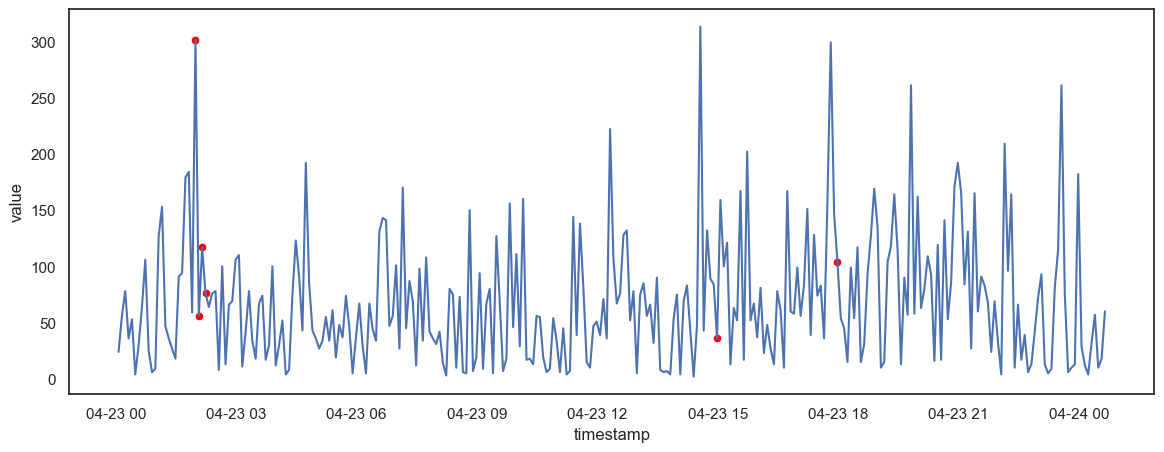

In [13]:
plt.figure(figsize=(14,5))
# plot the parrt of data frame
_ = sb.lineplot(data=df[df['timestamp'] >= '2014-04-23'],x='timestamp',y='value')
# plot the anomaly detected by IsolationForest
_ = sb.scatterplot(data =df[(df['timestamp'] >= '2014-04-23') & (df['forest_anomaly'] == -1)],
                   x='timestamp',y='value',color='red')

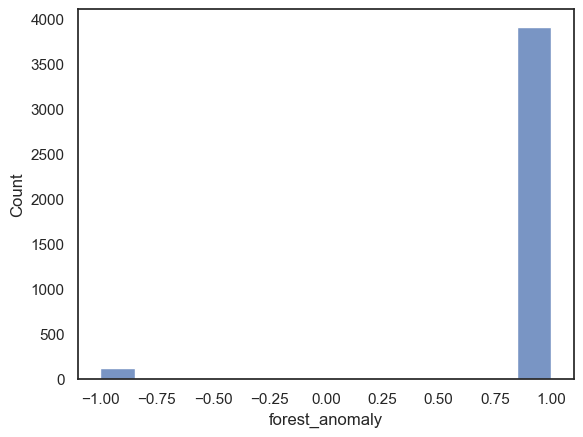

In [14]:
_ = sb.histplot(df,x='forest_anomaly')

In [15]:
# decomposition data
from sklearn.decomposition import PCA
pc = PCA(n_components=2).fit_transform(X)
df[['p1','p2']] = pc

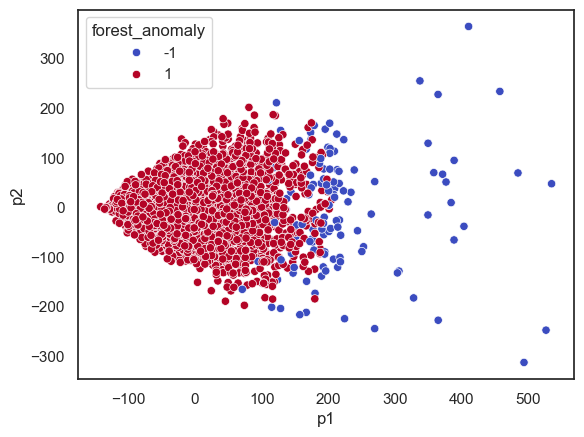

In [16]:
# PCA for visualization
_ = sb.scatterplot(data=df,x='p1',y='p2',hue='forest_anomaly',palette='coolwarm')